<a href="https://colab.research.google.com/github/Yolde/supply-chain-using-genetic-algorithm/blob/main/Nigeria_Gas_Supply_Chain_Using_Genetic_Algorithm_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [221]:
import ipywidgets as widgets
from IPython.display import display
import matplotlib.pyplot as plt
import numpy as np
import random
import ast  # Import ast for safe literal evaluation

In [222]:
# Function to create the input interface
def create_input_interface():
    # Input fields
    refinery_count = widgets.IntSlider(value=3, min=1, max=50, step=1, description='Refineries:')
    depot_count = widgets.IntSlider(value=5, min=1, max=100, step=1, description='Depots:')
    refinery_capacities = widgets.Textarea(
        value='[("Dangote",650000),("NPDC",25000),("MRS",5000),("Kaduna",110000),("PHC",300000),("Warri",125000),("Indorama",10000)]',
        placeholder='Enter refinery-capacity pairs as a list of tuples',
        description='Refineries & Capacities:',
        layout=widgets.Layout(width='90%'),
    )
    depot_distances = widgets.Textarea(
        value=(
            '[{"Depot_1": {"Dangote": 50, "NPDC": 45, "MRS": 50, "Kaduna": 80, "PHC": 70, "Warri": 45, "Indorama": 60}},\n'
   '{"Depot_2": {"Dangote": 60, "NPDC": 90, "MRS": 40, "Kaduna": 70, "PHC": 95, "Warri": 55, "Indorama": 65}},\n'
  '{"Depot_3": {"Dangote": 65, "NPDC": 50, "MRS": 60, "Kaduna": 75, "PHC": 80, "Warri": 50, "Indorama": 70}},\n'
   '{"Depot_4": {"Dangote": 55, "NPDC": 60, "MRS": 55, "Kaduna": 85, "PHC": 65, "Warri": 60, "Indorama": 75}},\n'
   '{"Depot_5": {"Dangote": 70, "NPDC": 80, "MRS": 45, "Kaduna": 90, "PHC": 75, "Warri": 65, "Indorama": 80}},\n'
  '{"Depot_6": {"Dangote": 45, "NPDC": 85, "MRS": 70, "Kaduna": 60, "PHC": 90, "Warri": 80, "Indorama": 55}},\n'
   '{"Depot_7": {"Dangote": 60, "NPDC": 70, "MRS": 50, "Kaduna": 95, "PHC": 85, "Warri": 55, "Indorama": 65}},\n'
   '{"Depot_8": {"Dangote": 50, "NPDC": 60, "MRS": 65, "Kaduna": 80, "PHC": 70, "Warri": 70, "Indorama": 60}},\n'
   '{"Depot_9": {"Dangote": 55, "NPDC": 75, "MRS": 60, "Kaduna": 85, "PHC": 60, "Warri": 50, "Indorama": 75}},\n'
   '{"Depot_10": {"Dangote": 65, "NPDC": 55, "MRS": 50, "Kaduna": 90, "PHC": 80, "Warri": 65, "Indorama": 80}},\n'
   '{"Depot_11": {"Dangote": 70, "NPDC": 80, "MRS": 40, "Kaduna": 75, "PHC": 85, "Warri": 60, "Indorama": 70}},\n'
   '{"Depot_12": {"Dangote": 50, "NPDC": 65, "MRS": 55, "Kaduna": 80, "PHC": 95, "Warri": 75, "Indorama": 55}},\n'
   '{"Depot_13": {"Dangote": 60, "NPDC": 90, "MRS": 45, "Kaduna": 85, "PHC": 70, "Warri": 65, "Indorama": 85}},\n'
   '{"Depot_14": {"Dangote": 55, "NPDC": 60, "MRS": 70, "Kaduna": 75, "PHC": 80, "Warri": 50, "Indorama": 60}},\n'
  '{"Depot_15": {"Dangote": 80, "NPDC": 55, "MRS": 60, "Kaduna": 70, "PHC": 90, "Warri": 75, "Indorama": 65}},\n'
   '{"Depot_16": {"Dangote": 70, "NPDC": 85, "MRS": 50, "Kaduna": 90, "PHC": 95, "Warri": 80, "Indorama": 75}},\n'
   '{"Depot_17": {"Dangote": 60, "NPDC": 75, "MRS": 65, "Kaduna": 70, "PHC": 80, "Warri": 55, "Indorama": 80}},\n'
   '{"Depot_18": {"Dangote": 55, "NPDC": 60, "MRS": 70, "Kaduna": 85, "PHC": 75, "Warri": 65, "Indorama": 60}},\n'
  '{"Depot_19": {"Dangote": 50, "NPDC": 80, "MRS": 65, "Kaduna": 75, "PHC": 70, "Warri": 55, "Indorama": 50}},\n'
   '{"Depot_20": {"Dangote": 65, "NPDC": 50, "MRS": 50, "Kaduna": 85, "PHC": 60, "Warri": 60, "Indorama": 75}},\n'
  '{"Depot_21": {"Dangote": 55, "NPDC": 70, "MRS": 45, "Kaduna": 95, "PHC": 80, "Warri": 70, "Indorama": 80}},\n'
   '{"Depot_22": {"Dangote": 75, "NPDC": 65, "MRS": 60, "Kaduna": 80, "PHC": 75, "Warri": 85, "Indorama": 60}},\n'
   '{"Depot_23": {"Dangote": 70, "NPDC": 80, "MRS": 50, "Kaduna": 75, "PHC": 85, "Warri": 55, "Indorama": 65}},\n'
   '{"Depot_24": {"Dangote": 65, "NPDC": 85, "MRS": 45, "Kaduna": 90, "PHC": 75, "Warri": 70, "Indorama": 75}},\n'
   '{"Depot_25": {"Dangote": 60, "NPDC": 70, "MRS": 60, "Kaduna": 80, "PHC": 95, "Warri": 50, "Indorama": 85}}]'
        ),
        placeholder='Enter depot-distance pairs as a list of dictionaries',
        description='Depots & Distances:',
        layout=widgets.Layout(width='90%'),
    )
    cost_per_mile = widgets.FloatText(value=1.5, description='Cost/Mile:')
    run_button = widgets.Button(description="Run Optimization", button_style="success")

    # Display input widgets
    display(refinery_count, depot_count, refinery_capacities, depot_distances, cost_per_mile, run_button)

    return refinery_count, depot_count, refinery_capacities, depot_distances, cost_per_mile, run_button


In [223]:
# Optimization Logic
def genetic_algorithm_optimization(refineries, depot_demands, distances, cost_per_mile):
    """
    Genetic Algorithm optimization logic
    """
    # Flatten distance data
    flattened_distances = {
        (refinery, depot): distances[depot][refinery]
        for depot in distances
        for refinery in distances[depot]
    }

    # Create dummy solution for illustration
    optimal_solution = list(refineries.keys())[: len(depot_demands)]

    # Ensure depot_demands values are numeric (int/float)
    depot_demands = {key: int(value) for key, value in depot_demands.items()}

    total_cost = sum(
        flattened_distances[(refinery, depot)] * depot_demands[depot] * cost_per_mile
        for refinery, depot in zip(optimal_solution, depot_demands)
    )
    return optimal_solution, total_cost


In [227]:
# Plot Results
def plot_network(refineries, depot_demands, optimal_solution, distances):
    plt.figure(figsize=(15, 10))

    # Assign a unique color for each refinery
    refinery_colors = {refinery: np.random.rand(3,) for refinery in refineries}

    # Generate random coordinates for depots (just like refineries)
    depot_coords = {depot: (random.randint(1, 100), random.randint(1, 100)) for depot in depot_demands}

    for depot in depot_demands:
        for refinery in refineries:
            # Check if the depot has a valid distance to the refinery
            if depot in distances and refinery in distances[depot]:
                distance = distances[depot][refinery]
                # Get coordinates for the refinery and depot locations
                depot_coord = depot_coords[depot]  # Coordinates for depots
                refinery_coord = refineries[refinery]  # Coordinates for refineries
                plt.plot(
                    [refinery_coord[0], depot_coord[0]],  # X coordinates
                    [refinery_coord[1], depot_coord[1]],  # Y coordinates
                    'o-',
                    color=refinery_colors[refinery],
                    label=f'{refinery} to {depot} ({str(distance)} miles)'  # Convert distance to string
                )
                plt.text(
                    (refinery_coord[0] + depot_coord[0]) / 2,
                    (refinery_coord[1] + depot_coord[1]) / 2,
                    f'{str(distance)}',  # Convert distance to string
                    fontsize=8, color='black', ha='center'
                )

    # Add labels and title
    plt.title("Optimal Network Graph")
    plt.xlabel("X-coordinate")
    plt.ylabel("Y-coordinate")
    plt.legend()
    plt.grid(True)
    plt.show()

In [230]:
# Main function to handle interaction
def on_run_clicked(b):
    try:
        # Get user inputs
        ref_count = refinery_count.value
        dep_count = depot_count.value
        ref_data = ast.literal_eval(refinery_capacities.value)  # Safe eval
        dep_data = ast.literal_eval(depot_distances.value)  # Safe eval
        cost = cost_per_mile.value

        # Transform inputs
        refineries = {ref[0]: (random.randint(1, 100), random.randint(1, 100)) for ref in ref_data}

        # Ensure that depot_demands has integer values
        depot_demands = {f"Depot_{i + 1}": random.randint(100, 500) for i in range(dep_count)}

        # Correct the construction of the distances dictionary
        distances = {}
        for d in dep_data:
            for depot, refinery_distances in d.items():
                distances[depot] = refinery_distances

        # Run optimization
        optimal_solution, total_cost = genetic_algorithm_optimization(refineries, depot_demands, distances, cost)

        # Output results
        print("Optimal Solution:", optimal_solution)
        print("Total Cost:", total_cost)
        plot_network(refineries, depot_demands, optimal_solution, distances)

    except Exception as e:
        print(f"Error: {e}")

IntSlider(value=3, description='Refineries:', max=50, min=1)

IntSlider(value=5, description='Depots:', min=1)

Textarea(value='[("Dangote",650000),("NPDC",25000),("MRS",5000),("Kaduna",110000),("PHC",300000),("Warri",1250…

Textarea(value='[{"Depot_1": {"Dangote": 50, "NPDC": 45, "MRS": 50, "Kaduna": 80, "PHC": 70, "Warri": 45, "Ind…

FloatText(value=1.5, description='Cost/Mile:')

Button(button_style='success', description='Run Optimization', style=ButtonStyle())

Optimal Solution: ['Dangote', 'NPDC', 'MRS']
Total Cost: 116325.0


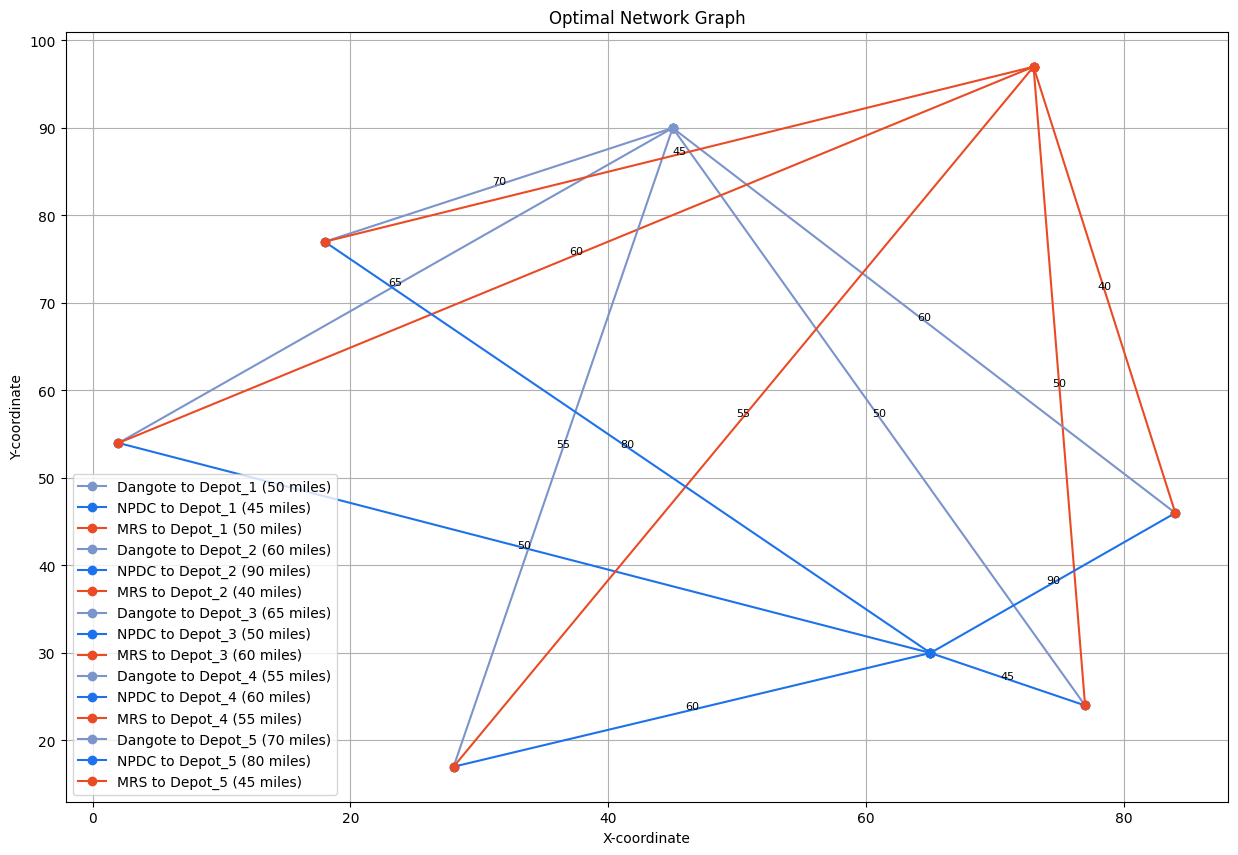

In [231]:
# Setup interaction
refinery_count, depot_count, refinery_capacities, depot_distances, cost_per_mile, run_button = create_input_interface()
run_button.on_click(on_run_clicked)